# Normality Tests for Data

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy
import pymc
import pandas as pd
import scipy.stats as stats

## Methods to test for Normality

1. [Histogram](#histogram_1): Create a histogram of your data and compare it to the bell-shaped curve of a normal distribution

2. [Mean and Median](#mean_median_1): We expect the mean to equal median for normally distributed data

3. [QQ Plot](#qq_1): Quantile-Quantile (QQ) plot can help you visually compare your data's quantiles to those of a normal distribution. If your data points closely follow the diagonal line on the QQ plot, it suggests normal distribution.

4. [Shapiro-Wilk Test](#shapiro_test): This is a formal statistical test that assesses whether a sample comes from a normal distribution. A low p-value from this test indicates that your data significantly deviates from a normal distribution.

5. [Kolmogorov-Smirnov Test](#kolmogorov_test): Another statistical test that compares your data's distribution to a theoretical normal distribution. It computes a D statistic, and you can compare it to critical values to determine if your data is normal.

6. [Anderson-Darling Test](#anderson_test): This test provides a measure of how well your data fits a normal distribution. It gives a critical value that can be compared to a calculated statistic from your data.

7. [Jarque-Bera Test](#


rque_test): This test checks for skewness and kurtosis in your data, which are characteristics of a normal distribution. If your data has skewness and kurtosis close to zero, it's more likely to be normally distributed.

8. [Kurtosis and Skewness](#skew_kurtosis_test): Calculate the skewness and kurtosis of your data. For a normal distribution, skewness should be close to zero, and kurtosis should be close to the normal distribution value of 3.

Remember that no test is perfect, and the results might depend on your sample size. It's also important to consider the context and purpose of your analysis. If your data doesn't perfectly fit a normal distribution, it doesn't necessarily mean your analysis is invalid; you might need to choose appropriate statistical methods for non-normal data.

Now, run the tests again with what you know is normally-distributed data now referred to as "Normal Data" to be brief.  Just to see the difference and for fun!

9. [Histogram - Normal Data](#histogram_normal_test")

10. [QQ Plot - Normal Data](#qq_normal_test)

11. [Shapiro-Wilk Test - Normal Data](#shapiro_normal_test)

12. [Kolmogorov-Smirnov Test - Normal Data](#kolmogorov_normal_test)

13. [Anderson-Darling Test - Normal Data](#anderson_normal_test)

14. [Jarque-Bera Test](#jarque_normal_test)

15. [Kurtosis and Skewness - Normal Data](#skewness_normal_test)

16. [Conclusion](#conclusion)

# Read data
<a id="read_data"></a>

This is simulated data that can be only positive such as work time duration for a particular process or auction prices for certain products, etc.  This generated data is known not to be normally distributed so let's run the battery of tests to see if they come up with the same conclusion.

In [2]:
df1 = pd.read_csv('../data/half_normal_data_mu15_std15.csv')
df1.head()

,session,rate
0,0,12.465066
1,1,29.124034
2,2,12.418092
3,3,21.618755
4,4,10.789454


In [3]:
my_data = df1['rate']

## 1. Historgram Visual Check
<a id="histogram_1"></a>

It does not look normally distributed.

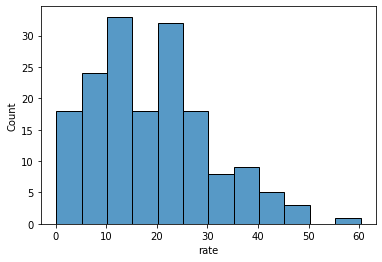

In [4]:
sns.histplot(data=my_data)
plt.show()

## 2. Mean and Median
<a id="mean_median_1"></a>

If data is normally distributed, I would expect the mean to be the same as the median.  As you can see, this data the mean is pretty close to the median so we continue with normality tests.

In [5]:
print("Mean :%10.6f   Median :%10.6f" % ( my_data.mean(), my_data.median()) )

Mean : 18.909599   Median : 18.370997


## 3. QQ Plot
<a id="qq_1"></a>

A QQ plot that visually shows how your data's quantiles compare to those of a 
normal distribution. If your data points fall closely along the diagonal line, 
it suggests that your data is normally distributed. If they deviate significantly, 
it might indicate non-normality.

The QQ plot below shows that a systematic deviation from the diagonal line at the lower and upper quantiles.  This suggests the data is not normally distributed.

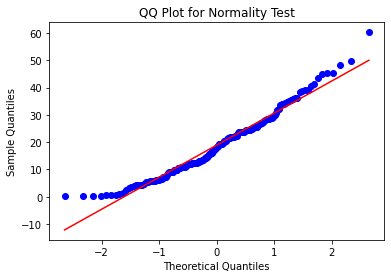

In [6]:
stats.probplot(my_data, dist="norm", plot=plt)

plt.title("QQ Plot for Normality Test")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# 4. Shapiro-Wilk Test
<a id="shapiro_test"></a>

The Shapiro-Wilk test returns both the test statistic and the p-value. The null hypothesis (H0) is that the data is normally distributed. The code then compares the p-value to the chosen significance level (alpha, often set to 0.05) to determine whether to reject the null hypothesis.

Remember that a p-value above the significance level suggests that your data is normally distributed, while a p-value below the significance level suggests that your data is not normally distributed.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [7]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(my_data)

# Set significance level
alpha = 0.05

# Interpret the results
print("Shapiro-Wilk Test:")
print(f"   Test Statistic: {statistic}")
print(f"   P-value       : {p_value}")

if p_value > alpha:
    print("Result: Data looks normally distributed (fail to reject H0)")
else:
    print("Result: Data does not look normally distributed (reject H0)")

Shapiro-Wilk Test:
   Test Statistic: 0.9648417234420776
   P-value       : 0.0002828710130415857
Result: Data does not look normally distributed (reject H0)


## 5. Kolmogorov-Smirnov Test
<a id="kolmogorov_test"></a>

The Kolmogorov-Smirnov test and returns both the test statistic and the p-value. The null hypothesis (H0) is that the data is normally distributed. The code then compares the p-value to the chosen significance level (alpha, often set to 0.05) to determine whether to reject the null hypothesis.

Similarly to other tests, a p-value above the significance level suggests that your data is normally distributed, while a p-value below the significance level suggests that your data is not normally distributed.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kolmogorov.html

In [8]:
# Perform the Kolmogorov-Smirnov test
statistic, p_value = stats.kstest(my_data, 'norm')

# Set significance level
alpha = 0.05

# Interpret the results
print("Kolmogorov-Smirnov Test:")
print(f"   Test Statistic : {statistic}")
print(f"   P-value        : {p_value}")

if p_value > alpha:
    print("Result: Data looks normally distributed (fail to reject H0)")
else:
    print("Result: Data does not look normally distributed (reject H0)")

Kolmogorov-Smirnov Test:
   Test Statistic : 0.9410591353963611
   P-value        : 3.1727894451177887e-208
Result: Data does not look normally distributed (reject H0)


## 6. Anderson-Darling Test
<a id="Anderson_test"></a>

The Anderson-Darling test and returns the test statistic, critical values, and significance levels. The null hypothesis (H0) is that the data is normally distributed. The code then compares the test statistic to the critical values at different significance levels to determine whether to reject the null hypothesis.

If the test statistic is lower than the critical value at a given significance level, you can conclude that your data is likely normally distributed at that level. If the test statistic is higher, your data is less likely to be normally distributed at that level.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

In [9]:
result = stats.anderson(my_data, dist='norm')

# Interpret the results
print("Anderson-Darling Test:")
print(f"   Test Statistic      : {result.statistic}")
print(f"   Critical Values     : {result.critical_values}")
print(f"   Significance Levels : {result.significance_level}")

for i, level in enumerate(result.significance_level):
    if result.statistic < result.critical_values[i]:
        print(f"Result at {level * 100}% significance level: Data looks normally distributed")
    else:
        print(f"Result at {level * 100}% significance level: Data does not look normally distributed")

Anderson-Darling Test:
   Test Statistic      : 1.3167034807261189
   Critical Values     : [0.563 0.641 0.769 0.898 1.068]
   Significance Levels : [15.  10.   5.   2.5  1. ]
Result at 1500.0% significance level: Data does not look normally distributed
Result at 1000.0% significance level: Data does not look normally distributed
Result at 500.0% significance level: Data does not look normally distributed
Result at 250.0% significance level: Data does not look normally distributed
Result at 100.0% significance level: Data does not look normally distributed


## 7. Jarque-Bera Test
<a id="jarque_test"></a>
The Jarque-Bera test and returns the test statistic and p-value. The null hypothesis (H0) is that the data is normally distributed. 

If the p-value is greater than the significance level, you can conclude that your data follows a normal distribution. If the p-value is lower, your data does not closely follow a normal distribution. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

In [10]:
# Perform the Jarque-Bera test
statistics, p_value = stats.jarque_bera(my_data)

# Set significance level
alpha = 0.05

# Interpret the results
print("Jarque-Bera Test:")
print(f"   Test Statistic: {statistic}")
print(f"   P-value       : {p_value}")

if p_value > alpha:
    print("Result: Data looks like it follows a normal distribution (fail to reject H0)")
else:
    print("Result: Data does not look like it follows a normal distribution (reject H0)")

Jarque-Bera Test:
   Test Statistic: 0.9410591353963611
   P-value       : 0.003345714741123329
Result: Data does not look like it follows a normal distribution (reject H0)


## 8. Skew and Kurtosis Tests
<a id="skew_kurtosis_test"></a>
Because the normal distribution has zero skewness and zero (“excess” or “Fisher”) kurtosis, the value 
of this statistic tends to be low for samples drawn from a normal distribution.

Keep in mind that while skewness and kurtosis can provide insights, they are **not definitive** tests of normality. It's important to consider other methods, like the ones I mentioned earlier (Shapiro-Wilk, Kolmogorov-Smirnov, etc.), to thoroughly assess the normality of your data.

In [11]:
# Calculate skewness and kurtosis
skewness = stats.skew(my_data)
kurtosis = stats.kurtosis(my_data)

# Interpret the results
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

# Interpretation of skewness and kurtosis values
if abs(skewness) < 0.5:
    print("Skewness suggests approximately symmetric distribution")
elif skewness < 0:
    print("Skewness suggests left-skewed distribution")
else:
    print("Skewness suggests right-skewed distribution")

if abs(kurtosis - 3) < 0.5:
    print("Kurtosis suggests approximately normal distribution")
elif kurtosis < 3:
    print("Kurtosis suggests platykurtic distribution (less peaky)")
else:
    print("Kurtosis suggests leptokurtic distribution (more peaky)")

Skewness: 0.6311108993485351
Kurtosis: 0.1604753099243883
Skewness suggests right-skewed distribution
Kurtosis suggests platykurtic distribution (less peaky)


# Normally Distributed Data
<a id="normal_data"></a>
Let's create normally distributed data and run throught the battery of tests again to compare results.

In [12]:
len(my_data)

169

In [13]:
# Generate the same number of normally distributed data as my test data used earlier

np.random.seed(seed=42)
normal_data = pd.Series(np.random.normal(loc=15, scale=15, size=len(my_data)))

In [14]:
normal_data[0:5]

0    22.450712
1    12.926035
2    24.715328
3    37.845448
4    11.487699
dtype: float64

## 9. Histogram - Normal Data
<a id="histogram_normal_test"></a>

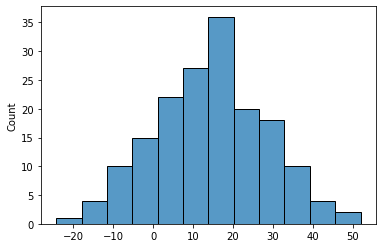

In [15]:
sns.histplot(data=normal_data)
plt.show()

## Mean and Median - Normal Data
<a id="mean_median_normal_test"></a>

In [16]:
print("Mean :%10.6f   Median :%10.6f" % ( normal_data.mean(), normal_data.median()))

Mean : 14.394999   Median : 14.797542


## 10. QQ Plot - Normal Data
<a id="qq_normal_test"></a>

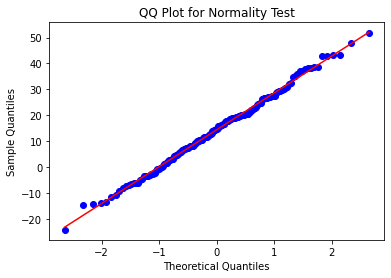

In [17]:
stats.probplot(normal_data, dist="norm", plot=plt)

plt.title("QQ Plot for Normality Test")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

## 11. Shapiro-Wilk Test - Normal Data
<a id="shapiro_normal_test"></a>

In [18]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(normal_data)

# Set significance level
alpha = 0.05

# Interpret the results
print("Shapiro-Wilk Test:")
print(f"   Test Statistic: {statistic}")
print(f"   P-value       : {p_value}")

if p_value > alpha:
    print("Result: Data looks normally distributed (fail to reject H0)")
else:
    print("Result: Data does not look normally distributed (reject H0)")

Shapiro-Wilk Test:
   Test Statistic: 0.9961347579956055
   P-value       : 0.9439550042152405
Result: Data looks normally distributed (fail to reject H0)


## 12. Kolmogorov-Smirnov Test - Normal Data
<a id="kolmogorov_normal_test"></a>

In [19]:
# Perform the Kolmogorov-Smirnov test
statistic, p_value = stats.kstest(normal_data, 'norm')

# Set significance level
alpha = 0.05

# Interpret the results
print("Kolmogorov-Smirnov Test:")
print(f"   Test Statistic : {statistic}")
print(f"   P-value        : {p_value}")

if p_value > alpha:
    print("Result: Data looks normally distributed (fail to reject H0)")
else:
    print("Result: Data does not look normally distributed (reject H0)")

Kolmogorov-Smirnov Test:
   Test Statistic : 0.7967953663897764
   P-value        : 1.1387358122747536e-115
Result: Data does not look normally distributed (reject H0)


## 13. Anderson-Darling Test - Normal Data
<a id="anderson_normal_test"></a>

In [20]:
result = stats.anderson(normal_data, dist='norm')

# Interpret the results
print("Anderson-Darling Test:")
print(f"   Test Statistic      : {result.statistic}")
print(f"   Critical Values     : {result.critical_values}")
print(f"   Significance Levels : {result.significance_level}")

for i, level in enumerate(result.significance_level):
    if result.statistic < result.critical_values[i]:
        print(f"Result at {level * 100}% significance level: Data looks normally distributed")
    else:
        print(f"Result at {level * 100}% significance level: Data does not look normally distributed")

Anderson-Darling Test:
   Test Statistic      : 0.20110959913478155
   Critical Values     : [0.563 0.641 0.769 0.898 1.068]
   Significance Levels : [15.  10.   5.   2.5  1. ]
Result at 1500.0% significance level: Data looks normally distributed
Result at 1000.0% significance level: Data looks normally distributed
Result at 500.0% significance level: Data looks normally distributed
Result at 250.0% significance level: Data looks normally distributed
Result at 100.0% significance level: Data looks normally distributed


## 14. Jarque-Bera Test - Normal Data
<a id="jarque_normal_test"></a>

In [21]:
# Perform the Jarque-Bera test
statistics, p_value = stats.jarque_bera(normal_data)

# Set significance level
alpha = 0.05

# # Interpret the results
print("Jarque-Bera Test:")
print(f"   Test Statistic: {statistic}")
print(f"   P-value       : {p_value}")


if p_value > alpha:
    print("Result: Data looks like it follows a normal distribution (fail to reject H0)")
else:
    print("Result: Data does not look like it follows a normal distribution (reject H0)")

Jarque-Bera Test:
   Test Statistic: 0.7967953663897764
   P-value       : 0.8690692458603269
Result: Data looks like it follows a normal distribution (fail to reject H0)


## 15. Skewness and Kurtosis - Normal Data
<a id="skewness_normal_test"></a>

In [22]:
# Calculate skewness and kurtosis
skewness = stats.skew(normal_data)
kurtosis = stats.kurtosis(normal_data)

# Interpret the results
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

# Interpretation of skewness and kurtosis values
if abs(skewness) < 0.5:
    print("Skewness suggests approximately symmetric distribution")
elif skewness < 0:
    print("Skewness suggests left-skewed distribution")
else:
    print("Skewness suggests right-skewed distribution")

if abs(kurtosis - 3) < 0.5:
    print("Kurtosis suggests approximately normal distribution")
elif kurtosis < 3:
    print("Kurtosis suggests platykurtic distribution (less peaky)")
else:
    print("Kurtosis suggests leptokurtic distribution (more peaky)")

Skewness: 0.033162769216059165
Kurtosis: -0.18830471735921073
Skewness suggests approximately symmetric distribution
Kurtosis suggests platykurtic distribution (less peaky)


# Conclusion
<a id="conclusion"></a>

For non-normally distributed data, it seems most of the tests above are pretty good at rejecting 
the hypothesis that the data is normally distributed.  

An interesting find is that some of the tests such as the Kolmogorov-Smirnov test rejected the normally distributed generated data's null hypothesis 
(H0: data is normally distributed) which was indeed normally distributed.  Each test can have its own limitation so it's good to look at all 
the tests on an aggregate level to determine if your data is normally distributed.

What if your data is not normally distributed?  Then, you will need to perform non-parametric tests such as Bayesian statistics.  